In [1]:
import plotly.io as pio
pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# Project 3: Hypothesis Testing

- Author: Chloe Yu

In this project, we will utilize what we have learned throughout our course `computing in context` and finalize our data analytic product. We will continue to explore the interesting statiscal patterns in macroeconomic data to help us understand the effect and drivers of monetary policy. For this segment, we go on to hypothesize that job openings from different sector has positve influence on the changes in federal fund rate. 

### 0. General Information

1. Datasets to be used: 

    [Job Opening:](https://fred.stlouisfed.org/series/JTSJOL)

    `https://fred.stlouisfed.org/series/JTSJOL`

    [Effective Federal Fund Rate:](https://fred.stlouisfed.org/series/EFFR)

    `https://fred.stlouisfed.org/series/EFFR`

2. Analysis Question: 

    Does changes in job openings in various non-famr sectors has a positive relationship with the changes in federal fund rate. 

3. Columns that will be used:

   'Date',

    'JTSJOL': Total Nonfarm,

    'JTS2300JOL': Construction,
    
    'JTS3000JOL': Manufacturing,
    
    'JTS540099JOL': Professional and Business Services,

    'JTS9000JOL': Government,
    
    'JTU5100JOL': Information,

    'JTS4400JOL': Retail Trade,

    'JTU480099JOL': Transportation, Warehousing, and Utilities,

    'JTS7100JOL': Arts, Entertainment, and Recreation,

    'JTU5300JOL': Real Estate and Rental and Leasing,

    'JTU4200JOL': Wholesale Trade,

    'JTS7000JOL': Leisure and Hospitality,

    'JTS6200JOL': Health Care and Social Assistance
    
4. Columns to be used to merge/join them:

    `Date`

5. Site URL:
`file:///Users/yuxiaohan/Documents/SIPA/Computing in Context/🐟/_build/html/index.html`

6. [Github Page]('https://github.com/ChloeYu84/Project_Computing-in-Context')

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Preprocessing

In [3]:
# Load datasets
job_openings = pd.read_csv('data/jobopenings.csv')
fed_funds = pd.read_csv('data/FEDFUNDS.csv')

Similar to last time, we will have to perform some preliminary processing and cleaning to make sure the data makes sense for our analysis and is easy to interpret when plot. We want to rename the columns for consistency in merging and help streamline variable to more interpretable ones. 

In [4]:
fed_funds = fed_funds.rename(columns={'DATE': 'Date', 'FEDFUNDS': 'Federal Fund Rate'})
fed_funds.head()

,Date,Federal Fund Rate
0,2014-01-01,0.07
1,2014-02-01,0.07
2,2014-03-01,0.08
3,2014-04-01,0.09
4,2014-05-01,0.09


In [5]:
job_openings.rename(columns={
    'DATE': 'Date',
    'JTSJOL': 'Total Nonfarm',
    'JTS2300JOL': 'Construction',
    'JTS3000JOL': 'Manufacturing',
    'JTS540099JOL': 'Professional and Business Services',
    'JTS9000JOL': 'Government',
    'JTU5100JOL': 'Information',
    'JTS4400JOL': 'Retail Trade',
    'JTU480099JOL': 'Transportation, Warehousing, and Utilities',
    'JTS7100JOL': 'Arts, Entertainment, and Recreation',
    'JTU5300JOL': 'Real Estate and Rental and Leasing',
    'JTU4200JOL': 'Wholesale Trade',
    'JTS7000JOL': 'Leisure and Hospitality',
    'JTS6200JOL': 'Health Care and Social Assistance'
}, inplace=True)

job_openings.head()

,Date,Total Nonfarm,Construction,Manufacturing,Professional and Business Services,Leisure and Hospitality,Information,Health Care and Social Assistance,Government,"Transportation, Warehousing, and Utilities"
0,2014-01-01,6,155,261,713,596,110,630,389,174
1,2014-02-01,246,139,286,848,558,102,660,402,118
2,2014-03-01,15,125,282,773,571,102,678,425,140
3,2014-04-01,178,116,275,842,662,128,642,435,160
4,2014-05-01,181,119,294,857,710,104,734,441,157


In [6]:
# Convert 'date' columns to datetime format
job_openings['Date'] = pd.to_datetime(job_openings['Date'])
fed_funds['Date'] = pd.to_datetime(fed_funds['Date'])

Since the job opening data is given as change, while federal fund rate is given as the static data point, we will also need to transform the federal fund rate data to its percentage change. 

In [7]:
# Calculate the percentage change for the Federal Funds Rate
fed_funds['Federal Funds Rate (% Change)'] = fed_funds['Federal Fund Rate'].pct_change()  
fed_funds.head()

,Date,Federal Fund Rate,Federal Funds Rate (% Change)
0,2014-01-01,0.07,NaN
1,2014-02-01,0.07,0.000000
2,2014-03-01,0.08,0.142857
3,2014-04-01,0.09,0.125000
4,2014-05-01,0.09,0.000000


Now let's merge the dataset and take a look at its basical stastical properties and data types. 

In [8]:
merged_data = pd.merge(job_openings, fed_funds, on='Date', how='inner')

In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        129 non-null    datetime64[ns]
 1   Total Nonfarm                               129 non-null    int64         
 2   Construction                                129 non-null    int64         
 3   Manufacturing                               129 non-null    int64         
 4   Professional and Business Services          129 non-null    int64         
 5   Leisure and Hospitality                     129 non-null    int64         
 6   Information                                 129 non-null    int64         
 7   Health Care and Social Assistance           129 non-null    int64         
 8   Government                                  129 non-null    int64         
 9   Transporta

In [10]:
merged_data.describe()

,Date,Total Nonfarm,Construction,Manufacturing,Professional and Business Services,Leisure and Hospitality,Information,Health Care and Social Assistance,Government,"Transportation, Warehousing, and Utilities",Federal Fund Rate,Federal Funds Rate (% Change)
count,129,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,128.000000
mean,2019-05-02 03:32:05.581395456,25.751938,271.255814,496.217054,1376.937984,1007.527132,134.573643,1276.627907,723.232558,325.069767,1.558372,0.067588
min,2014-01-01 00:00:00,-1418.000000,116.000000,261.000000,713.000000,335.000000,61.000000,630.000000,389.000000,118.000000,0.050000,-0.923077
25%,2016-09-01 00:00:00,-189.000000,186.000000,336.000000,1109.000000,759.000000,104.000000,997.000000,527.000000,219.000000,0.100000,0.000000
50%,2019-05-01 00:00:00,18.000000,272.000000,444.000000,1268.000000,931.000000,124.000000,1123.000000,680.000000,300.000000,0.770000,0.004051
75%,2022-01-01 00:00:00,281.000000,351.000000,586.000000,1553.000000,1153.000000,149.000000,1641.000000,951.000000,388.000000,2.330000,0.084626
max,2024-09-01 00:00:00,956.000000,456.000000,997.000000,2416.000000,1771.000000,292.000000,2147.000000,1187.000000,627.000000,5.330000,1.500000
std,NaN,380.083750,96.829770,192.276939,386.867644,323.476310,45.827594,396.831889,215.226680,132.666063,1.813165,0.254368


### 2. Visualization

The scales seems very tricky to deal with, let's try to visualize the two data series to understand how their magnitude aligns. 

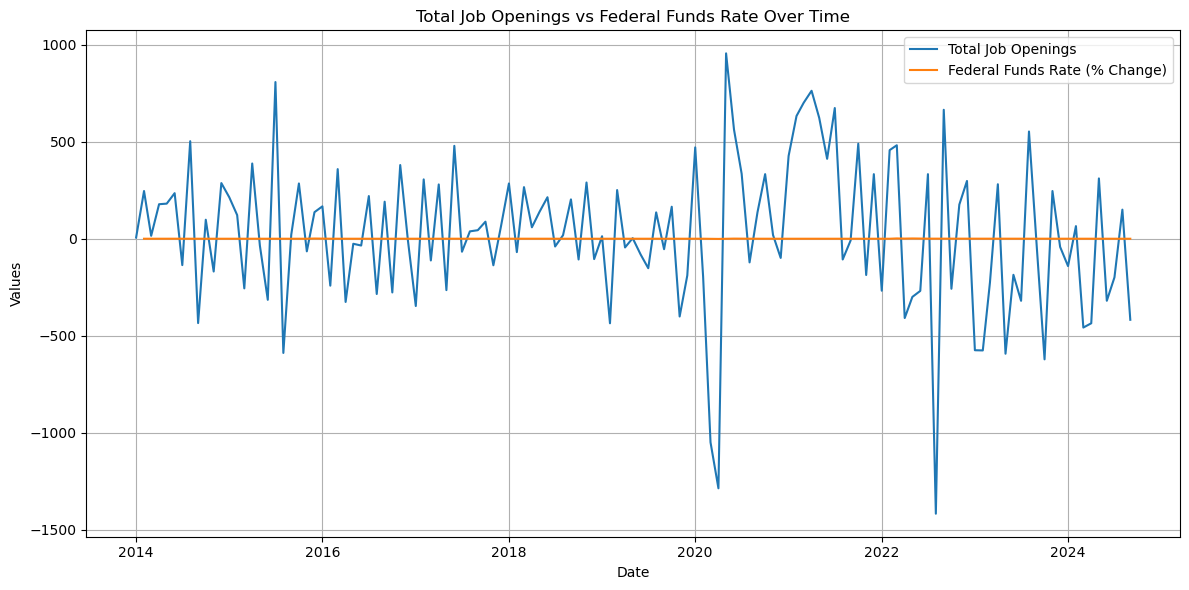

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Total Nonfarm'], label='Total Job Openings')
plt.plot(merged_data['Date'], merged_data['Federal Funds Rate (% Change)'], label='Federal Funds Rate (% Change)')
plt.title('Total Job Openings vs Federal Funds Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

As we can see, without further normalization, the scales of the two datasets cannot be used for sensible analysis. The magnitude of the two datasests are very, very different. We have to perform normalization to our dataset to make sure that the magnitude aligns. 

In [12]:
from sklearn.preprocessing import MinMaxScaler

sector_columns = job_openings.columns[1:]  # Exclude the 'date' column

scaler = MinMaxScaler(feature_range=(-1,1))
job_openings_normalized = job_openings.copy()
job_openings_normalized[sector_columns] = scaler.fit_transform(job_openings[sector_columns])

print("Normalized Job Openings Dataset:")
job_openings_normalized.tail()


Normalized Job Openings Dataset:


,Date,Total Nonfarm,Construction,Manufacturing,Professional and Business Services,Leisure and Hospitality,Information,Health Care and Social Assistance,Government,"Transportation, Warehousing, and Utilities"
124,2024-05-01,0.456613,0.470588,-0.116848,-0.061656,-0.213092,-0.385281,0.390903,0.626566,-0.155206
125,2024-06-01,-0.074979,0.076471,-0.421196,-0.264827,-0.153203,-0.653680,0.302571,0.571429,0.033399
126,2024-07-01,0.026959,-0.317647,-0.336957,-0.013506,-0.122563,-0.350649,0.100857,0.208020,-0.269155
127,2024-08-01,0.320977,0.247059,-0.375000,-0.129771,0.008357,-0.567100,0.125906,0.403509,-0.131631
128,2024-09-01,-0.157540,0.011765,-0.402174,-0.039342,-0.146240,-0.316017,-0.108767,0.072682,-0.296660


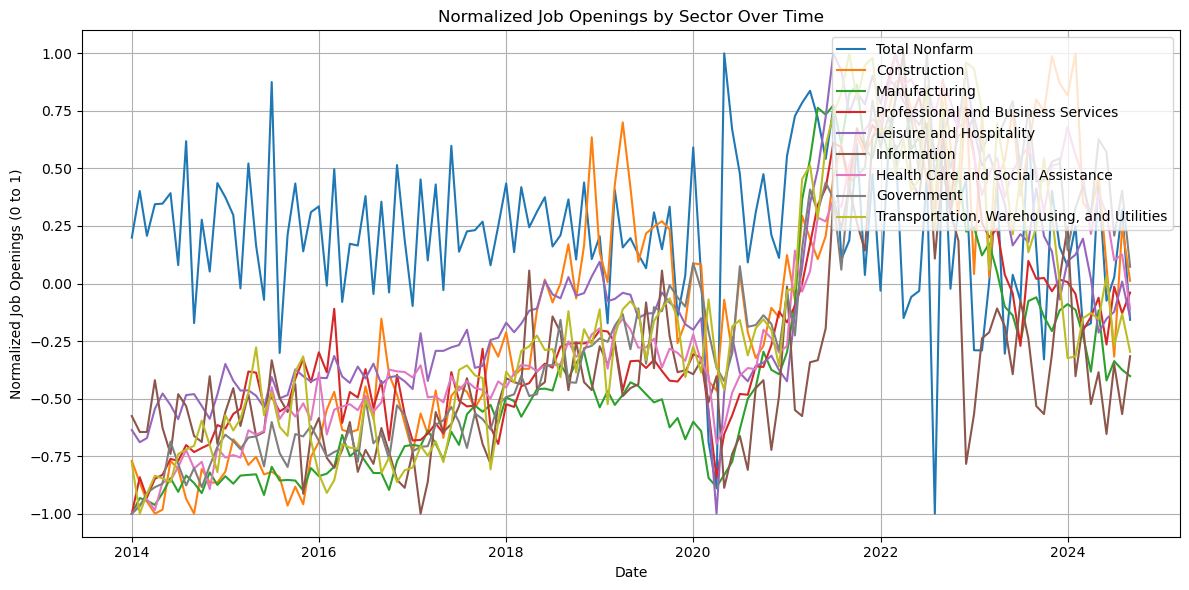

In [13]:
plt.figure(figsize=(12, 6))
for col in sector_columns:
    plt.plot(job_openings_normalized['Date'], job_openings_normalized[col], label=col)

plt.title('Normalized Job Openings by Sector Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Job Openings (0 to 1)')
plt.legend(loc='upper right')  # Move the legend inside the graph

plt.grid()
plt.tight_layout()
plt.show()

Let's now merge the two datasets.

In [14]:
# Merge with normalized job openings data
merged_data = pd.merge(job_openings_normalized, fed_funds, on='Date', how='inner')

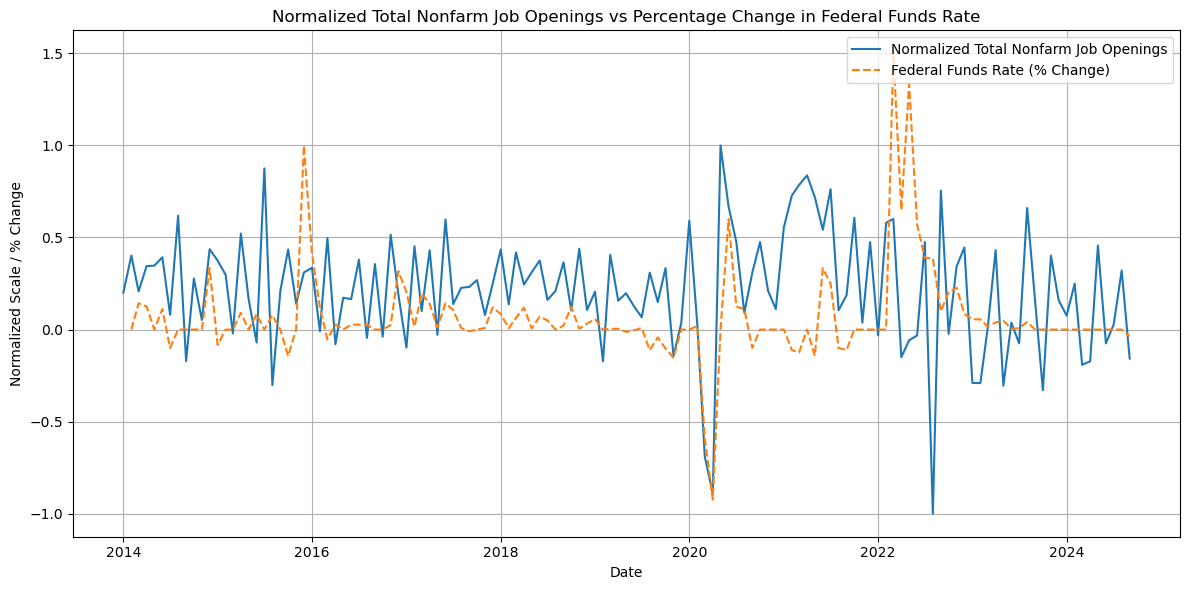

In [15]:
# Visualization: Percentage Change in Federal Funds Rate and Normalized Job Openings
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Total Nonfarm'], label='Normalized Total Nonfarm Job Openings')
plt.plot(merged_data['Date'], merged_data['Federal Funds Rate (% Change)'], label='Federal Funds Rate (% Change)', linestyle='--')

plt.title('Normalized Total Nonfarm Job Openings vs Percentage Change in Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Normalized Scale / % Change')
plt.legend(loc='upper right')  # Move the legend inside the graph
plt.grid()
plt.tight_layout()
plt.show()

Already from this visualization, we can see that there is significant positive correlation among the two data series. Let's see if this relationship holds for other individual sectors of job openings.

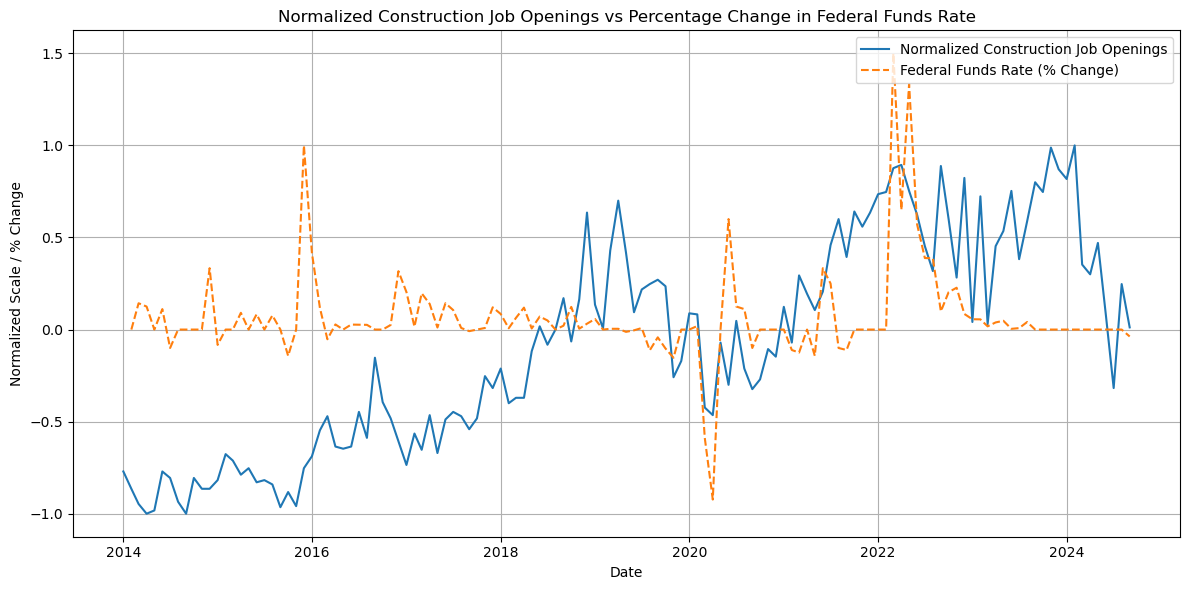

In [16]:
# Visualization: Percentage Change in Federal Funds Rate and Normalized Job Openings
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Construction'], label='Normalized Construction Job Openings')
plt.plot(merged_data['Date'], merged_data['Federal Funds Rate (% Change)'], label='Federal Funds Rate (% Change)', linestyle='--')

plt.title('Normalized Construction Job Openings vs Percentage Change in Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Normalized Scale / % Change')
plt.legend(loc='upper right')  # Move the legend inside the graph
plt.grid()
plt.tight_layout()
plt.show()

There still exists a lot of interesting correlating patterns, however, there is some minor difference, we can say that construction sectors seems to have a very consistent patterns that is somestimes uncorrelated with the changes in the federal fund rate, but this is something we need to perform regression to carefully test. 

Let's take a look at two more sectors before moving on to our tests. 

/var/folders/1l/cz0zq77d43dccjqlpzkz3ddm0000gn/T/ipykernel_511/2960664581.py:11: UserWarning:

Glyph 9 (	) missing from current font.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 9 (	) missing from current font.



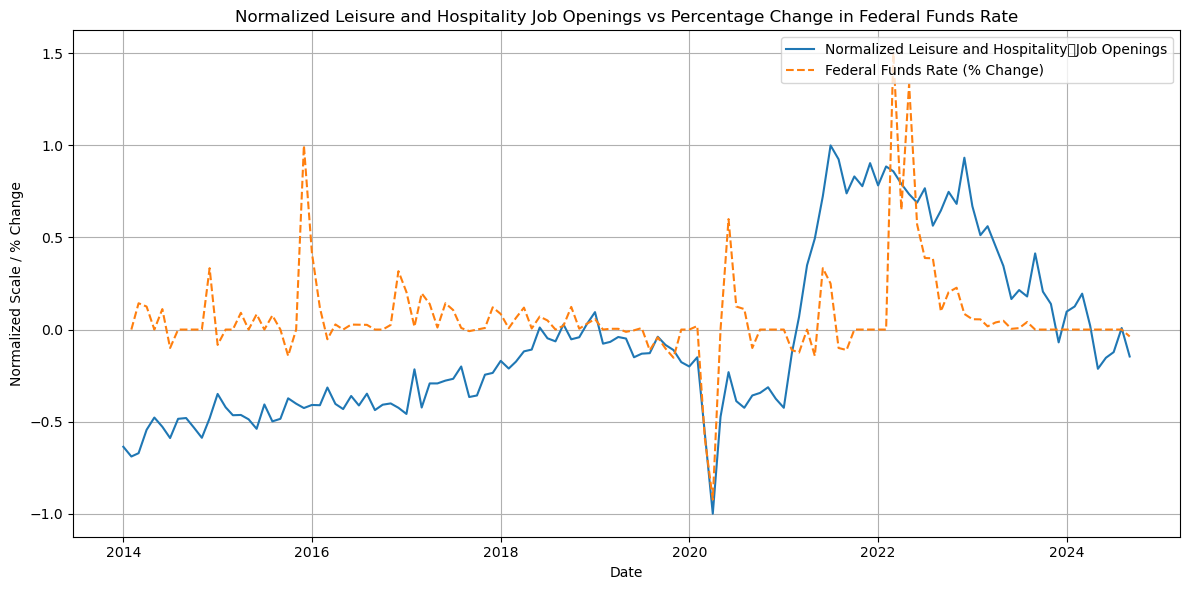

In [17]:
# Visualization: Percentage Change in Federal Funds Rate and Normalized Job Openings
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Leisure and Hospitality'], label='Normalized Leisure and Hospitality	Job Openings')
plt.plot(merged_data['Date'], merged_data['Federal Funds Rate (% Change)'], label='Federal Funds Rate (% Change)', linestyle='--')

plt.title('Normalized Leisure and Hospitality Job Openings vs Percentage Change in Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Normalized Scale / % Change')
plt.legend(loc='upper right')  # Move the legend inside the graph
plt.grid()
plt.tight_layout()
plt.show()

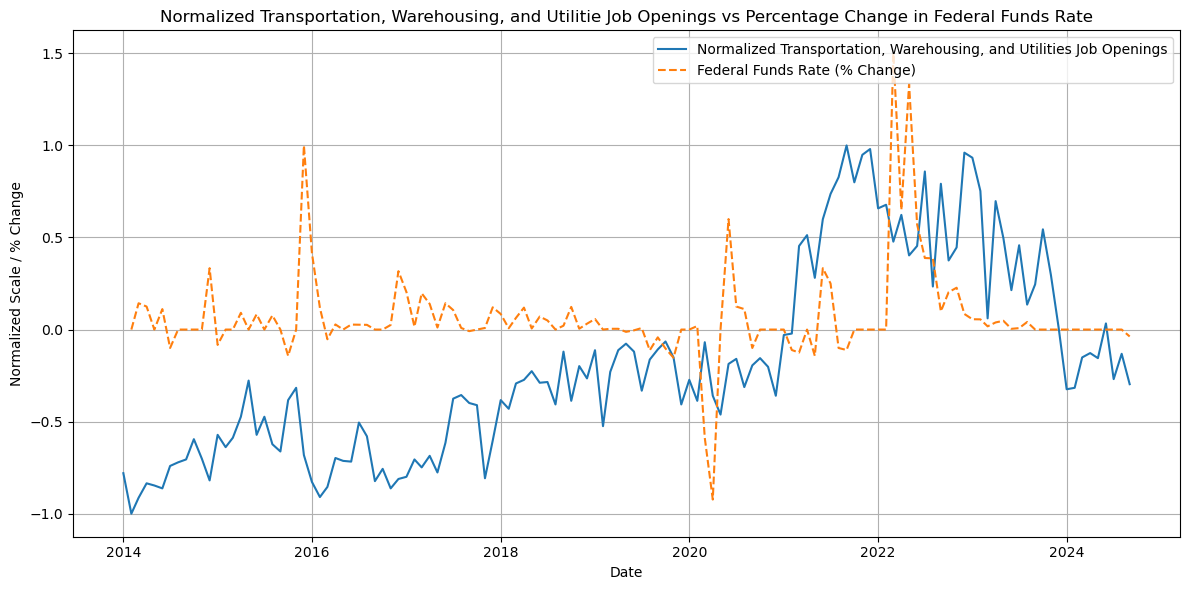

In [18]:
# Visualization: Percentage Change in Federal Funds Rate and Normalized Job Openings
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Transportation, Warehousing, and Utilities'], label='Normalized Transportation, Warehousing, and Utilities Job Openings')
plt.plot(merged_data['Date'], merged_data['Federal Funds Rate (% Change)'], label='Federal Funds Rate (% Change)', linestyle='--')

plt.title('Normalized Transportation, Warehousing, and Utilitie Job Openings vs Percentage Change in Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Normalized Scale / % Change')
plt.legend(loc='upper right')  # Move the legend inside the graph
plt.grid()
plt.tight_layout()
plt.show()

Despite the differences, we can observed that there is some underlying systematic drivers that affect both the job openings and federal fund to share similar seasonality and trends. 

Let's first construct a correlation matrix to distill this idea. 

### 3. Correlation Analysis

In [19]:
# Merge with Federal Funds Rate percentage change
merged_correlation_data = pd.merge(
    fed_funds[['Date', 'Federal Funds Rate (% Change)']],
    job_openings_normalized,
    on='Date',
    how='inner'
)

correlation_matrix = merged_correlation_data.drop(columns=['Date']).corr()

In [20]:
correlation_matrix

,Federal Funds Rate (% Change),Total Nonfarm,Construction,Manufacturing,Professional and Business Services,Leisure and Hospitality,Information,Health Care and Social Assistance,Government,"Transportation, Warehousing, and Utilities"
Federal Funds Rate (% Change),1.000000,0.148607,0.149798,0.292503,0.343420,0.315365,0.303202,0.279038,0.163815,0.116535
Total Nonfarm,0.148607,1.000000,0.003366,0.077249,0.073324,0.053894,-0.009203,-0.038360,-0.039094,0.022447
Construction,0.149798,0.003366,1.000000,0.780671,0.776731,0.804329,0.651150,0.876329,0.878667,0.798195
Manufacturing,0.292503,0.077249,0.780671,1.000000,0.935275,0.937356,0.783452,0.892196,0.842397,0.890905
Professional and Business Services,0.343420,0.073324,0.776731,0.935275,1.000000,0.934185,0.765382,0.909039,0.850366,0.880437
Leisure and Hospitality,0.315365,0.053894,0.804329,0.937356,0.934185,1.000000,0.759981,0.900115,0.841077,0.897935
Information,0.303202,-0.009203,0.651150,0.783452,0.765382,0.759981,1.000000,0.725712,0.666149,0.704167
Health Care and Social Assistance,0.279038,-0.038360,0.876329,0.892196,0.909039,0.900115,0.725712,1.000000,0.938962,0.862247
Government,0.163815,-0.039094,0.878667,0.842397,0.850366,0.841077,0.666149,0.938962,1.000000,0.884283
"Transportation, Warehousing, and Utilities",0.116535,0.022447,0.798195,0.890905,0.880437,0.897935,0.704167,0.862247,0.884283,1.000000


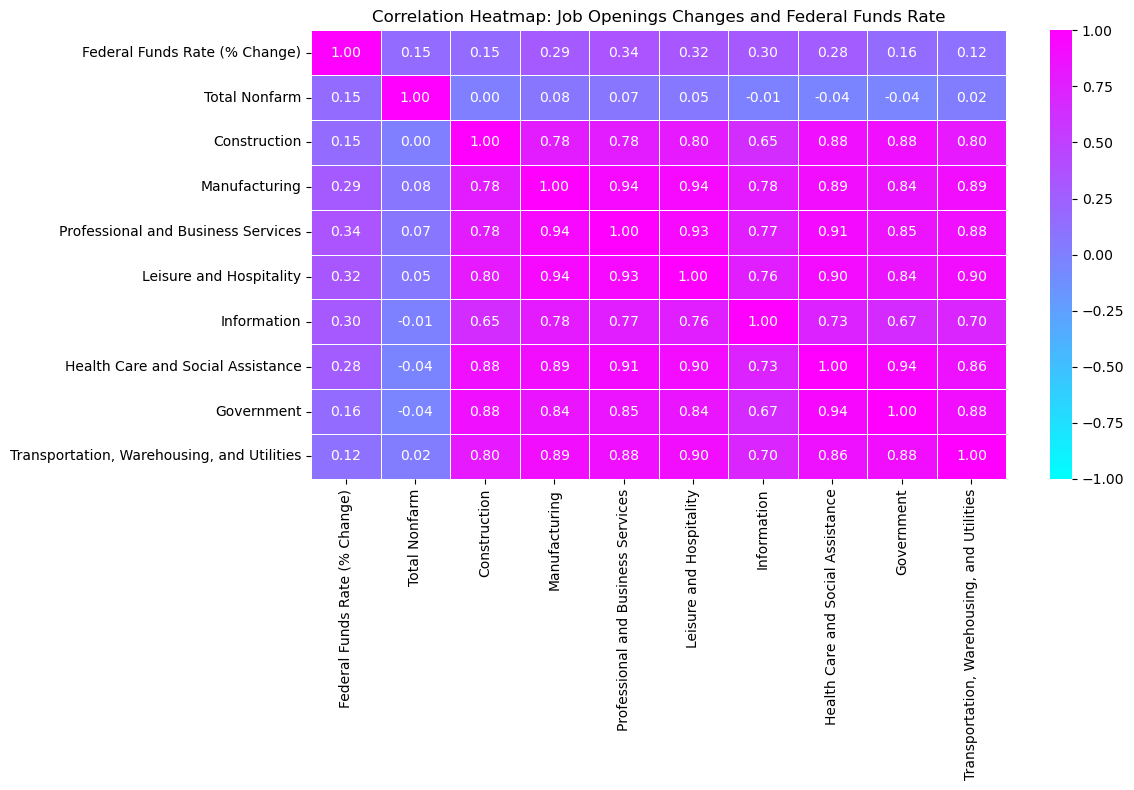

In [21]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="cool",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Heatmap: Job Openings Changes and Federal Funds Rate')
plt.tight_layout()
plt.show()

This correlation maps is not only visually very appealing, but it also shows us that there is significantly high correlation between the job openings in various sectors. However, we can also see that there is only weak positive associations between percentage changes in federal fund rate and job openings. 

### 4. Regression Analysis

In [22]:
import statsmodels.api as sm

In [23]:
# Prepare data for regression
regression_data = merged_correlation_data[['Total Nonfarm', 'Federal Funds Rate (% Change)']].dropna()

# Define dependent (Y) and independent (X) variables
X = regression_data['Total Nonfarm']
Y = regression_data['Federal Funds Rate (% Change)']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Federal Funds Rate (% Change)   R-squared:                       0.022
Model:                                       OLS   Adj. R-squared:                  0.014
Method:                            Least Squares   F-statistic:                     2.845
Date:                           Sun, 08 Dec 2024   Prob (F-statistic):             0.0941
Time:                                   14:37:56   Log-Likelihood:                -4.4645
No. Observations:                            128   AIC:                             12.93
Df Residuals:                                126   BIC:                             18.63
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [24]:
# Prepare data for regression
regression_data_full = merged_correlation_data.drop(columns=['Date']).dropna()

# Define dependent variable (Federal Funds Rate % Change) and independent variables (sector job openings)
Y_full = regression_data_full['Federal Funds Rate (% Change)']
X_full = regression_data_full.drop(columns=['Federal Funds Rate (% Change)'])

# Add a constant to the independent variables for the intercept
X_full = sm.add_constant(X_full)

# Fit the multiple regression model
full_model = sm.OLS(Y_full, X_full).fit()

# Display the regression results
print(full_model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Federal Funds Rate (% Change)   R-squared:                       0.331
Model:                                       OLS   Adj. R-squared:                  0.280
Method:                            Least Squares   F-statistic:                     6.478
Date:                           Sun, 08 Dec 2024   Prob (F-statistic):           1.87e-07
Time:                                   14:37:56   Log-Likelihood:                 19.802
No. Observations:                            128   AIC:                            -19.60
Df Residuals:                                118   BIC:                             8.916
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025  

In [25]:
robust_model = sm.RLM(Y_full, X_full).fit()

# Display robust regression results
print(robust_model.summary())

                          Robust linear Model Regression Results                         
Dep. Variable:     Federal Funds Rate (% Change)   No. Observations:                  128
Model:                                       RLM   Df Residuals:                      118
Method:                                     IRLS   Df Model:                            9
Norm:                                     HuberT                                         
Scale Est.:                                  mad                                         
Cov Type:                                     H1                                         
Date:                           Sun, 08 Dec 2024                                         
Time:                                   14:37:56                                         
No. Iterations:                               50                                         
                                                 coef    std err          z      P>|z|      [0.025  